In [1]:
%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
sns.set(style='whitegrid')

In [7]:
!ls -l ../../BrainPowerLogs/Firing/

total 64320
-rw-r--r--  1 jb  staff    691110 Dec  4 11:38 2015-12-04_11-37-27
-rw-r--r--  1 jb  staff  11186992 Dec  4 11:47 2015-12-04_11-38-02
-rw-r--r--  1 jb  staff   1462957 Dec  4 11:49 2015-12-04_11-47-39
-rw-r--r--  1 jb  staff   6050473 Dec  4 11:55 2015-12-04_11-50-37
-rw-r--r--  1 jb  staff   3704318 Dec  4 12:00 2015-12-04_11-55-21
-rw-r--r--  1 jb  staff   1706959 Dec  4 12:18 2015-12-04_12-17-03
-rw-r--r--  1 jb  staff   2159076 Dec  4 13:10 2015-12-04_13-06-59
-rw-r--r--  1 jb  staff    679687 Dec  4 13:12 2015-12-04_13-10-13
-rw-r--r--  1 jb  staff   1578582 Dec  4 13:17 2015-12-04_13-12-33
-rw-r--r--  1 jb  staff    295639 Dec  4 13:28 2015-12-04_13-28-10
-rw-r--r--  1 jb  staff    975524 Dec  4 13:29 2015-12-04_13-28-30
-rw-r--r--  1 jb  staff    604033 Dec  4 13:30 2015-12-04_13-29-50
-rw-r--r--  1 jb  staff    390486 Dec  4 13:30 2015-12-04_13-30-17
-rw-r--r--  1 jb  staff         0 Dec  4 13:30 2015-12-04_13-30-59
-rw-r--r--  1 jb  staff         0 Dec  4 13:31 201

In [22]:
firing = pd.read_csv('../../BrainPowerLogs/Firing/2015-12-04_13-34-56', header=None, names=['time', 'neuron', 'one'])
firing.time = pd.to_timedelta(firing.time, unit='ms') + pd.to_datetime('2015-12-04 13:34:56')
firing.head()

,time,neuron,one
0,2015-12-04 13:34:56.050,2335,1
1,2015-12-04 13:34:56.050,6595,1
2,2015-12-04 13:34:56.050,6599,1
3,2015-12-04 13:34:56.051,2315,1
4,2015-12-04 13:34:56.054,6594,1


In [24]:
energy = pd.read_csv('../../BrainPowerLogs/Energy/2015-12-04_13-34-56', header=None, names=['time', 'available_pools', 'total_energy'])
energy.time = pd.to_timedelta(energy.time, unit='ms') + pd.to_datetime('2015-12-04 13:34:56')
energy.index = energy.time
energy.head()

,time,available_pools,total_energy
time,,,
2015-12-04 13:34:56.004,2015-12-04 13:34:56.004,7520,7520
2015-12-04 13:34:56.005,2015-12-04 13:34:56.005,7520,7520
2015-12-04 13:34:56.006,2015-12-04 13:34:56.006,7520,7520
2015-12-04 13:34:56.007,2015-12-04 13:34:56.007,7520,7520
2015-12-04 13:34:56.008,2015-12-04 13:34:56.008,7520,7520


In [25]:
total_firing = firing.groupby('time').one.sum()

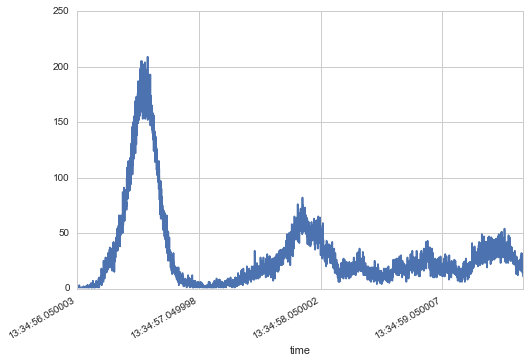

In [31]:
ax = total_firing.plot()

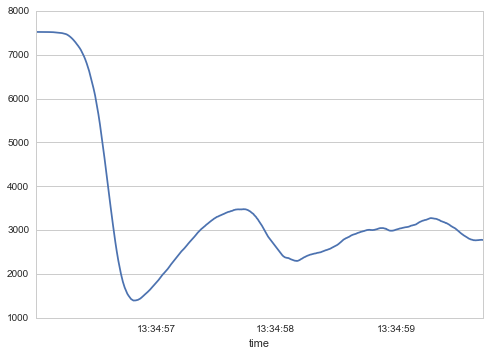

In [33]:
energy.total_energy.plot()

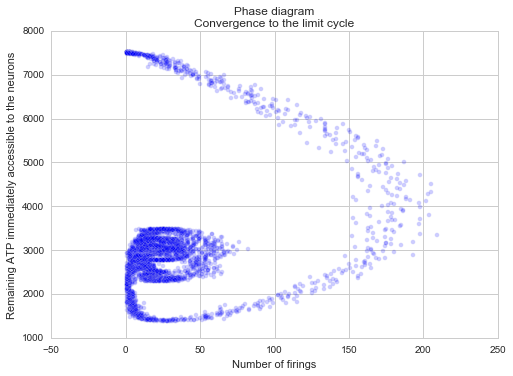

In [53]:
plt.scatter(total_firing, energy.total_energy.ix[total_firing.index], alpha=0.2)
plt.ylabel('Remaining ATP immediately accessible to the neurons')
plt.xlabel('Number of firings')
plt.title('Phase diagram\nConvergence to the limit cycle')
plt.savefig('lotka-volterra-1.pdf')
plt.savefig('lotka-volterra-1.png')

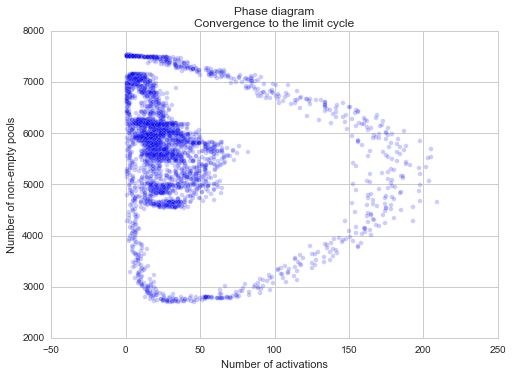

In [51]:
plt.scatter(total_firing, energy.available_pools.ix[total_firing.index], alpha=0.2)
plt.ylabel('Number of non-empty pools')
plt.xlabel('Number of activations')
plt.title('Phase diagram\nConvergence to the limit cycle')
plt.savefig('lotka-volterra-2.pdf')
plt.savefig('lotka-volterra-2.png')